In [1]:
import sqlite3

In [2]:
import pandas as pd

In [3]:
conn = sqlite3.connect("task7_database.db")  # This creates a new SQLite database file
cursor = conn.cursor()

In [4]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales_data (
        order_id INTEGER,
        product_name TEXT,
        category TEXT,
        quantity INTEGER,
        price REAL,
        order_date TEXT
    )
''')
conn.commit()

In [7]:
df = pd.read_csv("F:/Task6 notes/Sales_data.csv", encoding='latin1')

In [8]:
df.to_sql("sales_data", conn, if_exists="replace", index=False)

3203

In [9]:
pd.read_sql_query("SELECT * FROM sales_data LIMIT 5", conn)

,OrderID,Product Name,Unnamed: 2,Category,Price,Quantity,OrderDate
0,1,Bush Somerset Collection Bookcase,None,Furniture,261.96,2,2013-06-13
1,2,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",None,Furniture,731.94,3,2011-06-09
2,3,Self-Adhesive Address Labels for Typewriters b...,None,Office Supplies,14.62,2,2011-06-09
3,4,Bretford CR4500 Series Slim Rectangular Table,None,Furniture,957.58,5,2011-06-09
4,5,Eldon Fold 'N Roll Cart System,None,Office Supplies,22.37,2,2011-06-09


In [12]:
query = """                                            
SELECT category, SUM(quantity * price) AS total_sales   
FROM sales_data
GROUP BY category
ORDER BY total_sales DESC
"""
result_df = pd.read_sql_query(query, conn)      # Total sales by category
print(result_df)

          Category  total_sales
0       Technology   1516791.64
1        Furniture   1233009.60
2  Office Supplies   1130685.99


In [14]:
import matplotlib.pyplot as plt

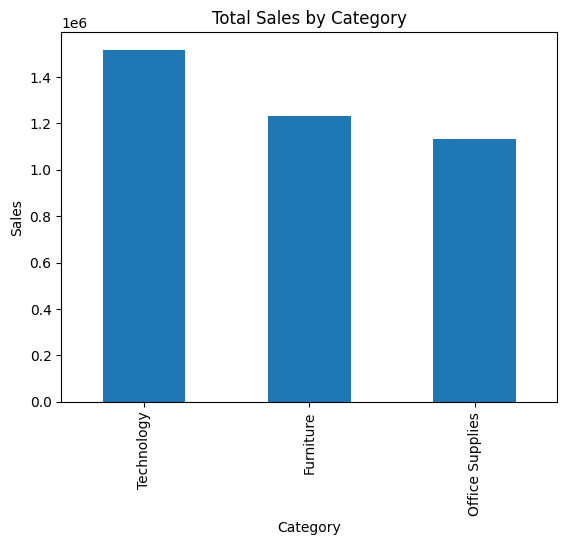

In [17]:
result_df.plot(kind='bar', x='Category', y='total_sales', legend=False)   #Bar plot of total sales by category
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.show()


In [24]:
query = """
SELECT [Product Name], SUM(quantity) AS total_quantity_sold
FROM sales_data
GROUP BY [Product Name]
ORDER BY total_quantity_sold DESC
LIMIT 5
"""

top_products = pd.read_sql_query(query, conn)
top_products

,Product Name,total_quantity_sold
0,Staples,94
1,Easy-staple paper,53
2,Staple envelope,51
3,Storex Dura Pro Binders,40
4,Fellowes Officeware Wire Shelving,38


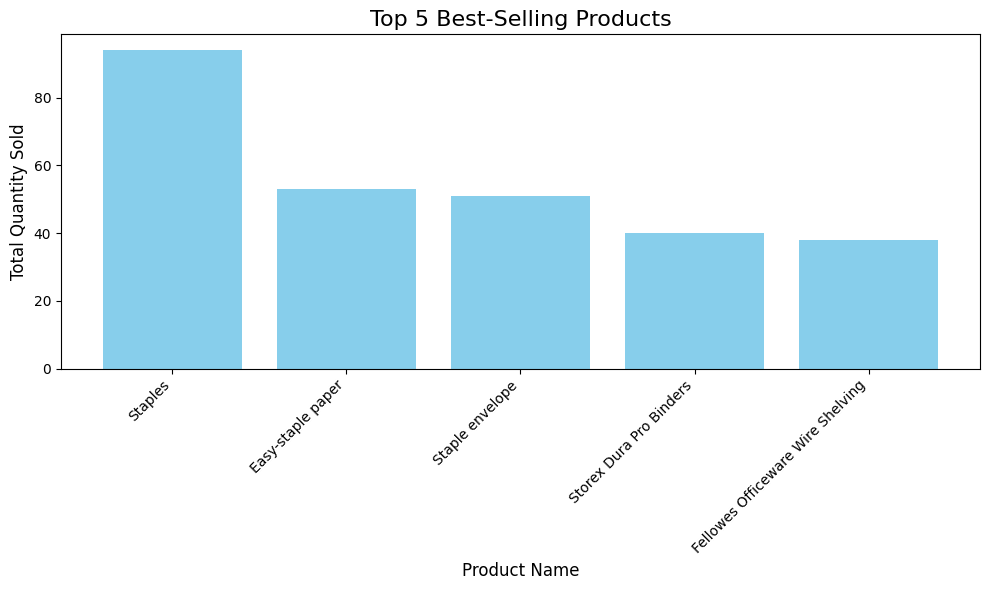

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(top_products["Product Name"], top_products["total_quantity_sold"], color='skyblue')

# Add titles and labels
plt.title("Top 5 Best-Selling Products", fontsize=16)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Total Quantity Sold", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.tight_layout()
plt.show()

In [18]:
## Summary of Insights.
Total Records Analyzed:
A total of 3,203 rows of sales data were successfully imported and analyzed.

Top-Selling Categories:
Based on total sales (quantity × price), the highest revenue-generating categories are:

Technology   1516791.64
Furniture   1233009.60
Office Supplies   1130685.99

Best-Selling Products:
Specific products with the highest number of units sold were:

Staples	94
Easy-staple paper	53
Staple envelope	51
Storex Dura Pro Binders	40
Fellowes Officeware Wire Shelving	38

Suggestions for Business:

Focus marketing on high-performing categories.

Analyze low-performing products for improvement or discontinuation.